In [51]:
#
import torch
import torch.nn as nn
import math
#
inputs = torch . tensor( [ [ 0.0 ] , [ 1.0 ] ] )
#
print( inputs )
#

tensor([[0.],
        [1.]])


In [52]:
def funx(w0,w1):

    return pow((1/(1+pow(math.e,-w0)))-1,2) + pow(1/(1+(pow(math.e,-w0-w1))),2)

In [53]:
weights = (-1,1)
learning_rate = 0.1

model = nn.Sequential(
    nn.Linear(1, 1, bias=True),
    nn.Sigmoid()
)

lossTimeX = []
lossTimeY = []

pointsX = []
pointsY = []
pointsZ = []

# with torch.no_grad():
#     model[0].weight.fill_(weights[1])
#     model[0].bias.fill_(weights[0])
#     print(model(inputs))

outputs = torch.tensor([[1], [0]])

loss_fn = nn.MSELoss(reduction='sum')

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for epoch in range(1000):
    loss = loss_fn(model(inputs), outputs.float())
    if epoch % 100 == 0:
        pointsY.append(model[0].weight.detach().numpy()[0][0])
        pointsX.append(model[0].bias.detach().numpy()[0])
        pointsZ.append(loss.item())
        
    if epoch % 100 == 0:
#         print(epoch, loss.item())
#         print("Item loss:",loss.item())
        lossTimeX.append(epoch)
        lossTimeY.append(loss.item())

    optimizer.zero_grad()

    loss.backward()
#     with torch.no_grad():
#         for param in model.parameters():
#             print(param.grad)
    optimizer.step()
#     print("After step")
#     with torch.no_grad():
#         for param in model.parameters():
#             print(param.grad)

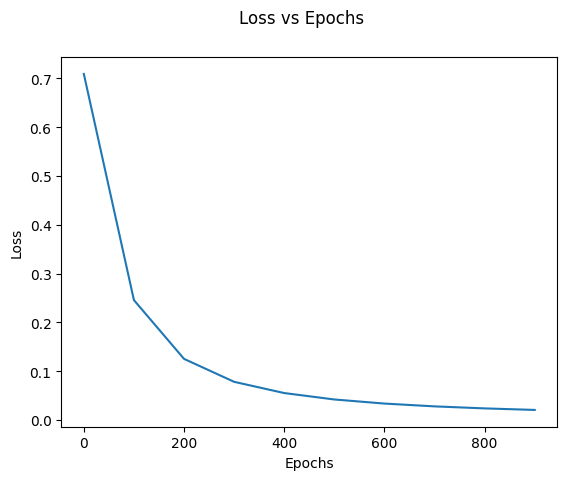

In [54]:
import matplotlib.pyplot as plt
plt.plot(lossTimeX, lossTimeY)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.suptitle('Loss vs Epochs')
plt.show()

(80, 80)


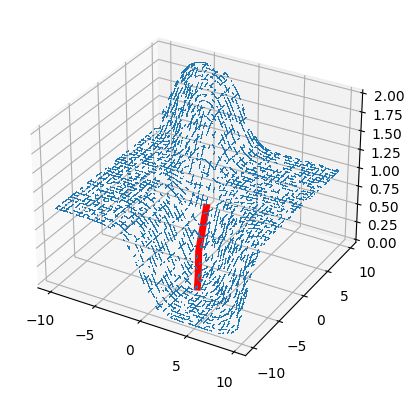

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import math
    
fig = plt.figure()
ax = plt.axes(projection='3d')

X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i][j] = funx(X[i][j],Y[i][j])

print(Z.shape)

ax.plot_wireframe(X, Y, Z, linewidth=0.001, antialiased=False)
ax.plot3D(pointsX, pointsY, pointsZ, linewidth='5', c='red');

ax.set_zlim(0, 2)

plt.show()